In [ ]:
# !pip install fiftyone

In [ ]:
!pip uninstall opencv-python --yes
!pip uninstall opencv-contrib-python --yes
# !pip install opencv-python==4.6.0.66
!pip install opencv-contrib-python==4.5.5.62

In [ ]:
# !apt-get update && apt-get install ffmpeg libsm6 libxext6  -y


In [ ]:
# !pip install -U --force 'git+https://github.com/leimao/cocoapi.git#subdirectory=PythonAPI'

In [1]:
import fiftyone as fo
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np

/opt/conda/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [13]:
from pprint import pprint

In [2]:
from pycocotools.coco import COCO

In [3]:
coco_annotation_file_path = "/opt/patchcore/data/CheXpert-v1.0-small/valid-ma/annotations/instances_default.json"

coco_annotation = COCO(annotation_file=coco_annotation_file_path)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [4]:
coco_annotation.info()

contributor: 
date_created: 
description: 
url: 
version: 
year: 


In [5]:
# Category IDs.
cat_ids = coco_annotation.getCatIds()
print(f"Number of Unique Categories: {len(cat_ids)}")
print("Category IDs:")
print(cat_ids)  # The IDs are not necessarily consecutive.

# All categories.
cats = coco_annotation.loadCats(cat_ids)
cat_names = [cat["name"] for cat in cats]
print("Categories Names:")
print(cat_names)

Number of Unique Categories: 44
Category IDs:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
Categories Names:
['consolidation', 'pneumoperitoneum', 'device', 'fracture', 'airspace-opacity', 'nodule', 'mass', 'lymphandopathy', 'pneumomediastinum', 'cardiomegaly', 'athersclerotic-calcification', 'wire', 'atelectasis', 'picc', 'vascular-catheter', 'chest-port', 'surgical-clip', 'stent', 'tavr', 'jewlery', 'rib-resection', 'fracture-chronic', 'pleural-effusion', 'surgical-drain', 'sternotomy-wires', 'pneumothorax', 'saline-implant-port', 'lap-band', 'emphysema', 'normal', 'endotracheal-tube', 'reticular-opacity', 'ossification', 'gastric-tube', 'coil', 'icd', 'sub-q-emphysema', 'vad', 'scoliosis', 'annuloplasty', 'tracheostomy-tube', 'hiatal-hernia', 'granuloma', 'breast-implant']


In [6]:
# Category ID -> Category Name.
query_id = cat_ids[0]
query_annotation = coco_annotation.loadCats([query_id])[0]
query_name = query_annotation["name"]
query_supercategory = query_annotation["supercategory"]
print("Category ID -> Category Name:")
print(
    f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}"
)

# Category Name -> Category ID.
query_name = cat_names[2]
query_id = coco_annotation.getCatIds(catNms=[query_name])[0]
print("Category Name -> ID:")
print(f"Category Name: {query_name}, Category ID: {query_id}")

# Get the ID of all the images containing the object of the category.
img_ids = coco_annotation.getImgIds(catIds=[query_id])
print(f"Number of Images Containing {query_name}: {len(img_ids)}")

Category ID -> Category Name:
Category ID: 1, Category Name: consolidation, Supercategory: 
Category Name -> ID:
Category Name: device, Category ID: 3
Number of Images Containing device: 18


In [7]:
data_dir = '/opt/patchcore/data/CheXpert-v1.0-small/'

Image ID: 64, File Name: valid/patient64653/study1/view1_frontal.jpg, Image URL: 
Annotations for Image ID 64:
[{'area': 35835.0,
  'attributes': {'occluded': False},
  'bbox': [1024.6, 29.44, 163.74, 354.37],
  'category_id': 31,
  'id': 187,
  'image_id': 64,
  'iscrowd': 0,
  'segmentation': [[1024.6,
                    29.44,
                    1058.82,
                    261.61,
                    1085.7,
                    361.81,
                    1139.47,
                    383.81,
                    1188.34,
                    339.82,
                    1173.68,
                    220.06,
                    1163.9,
                    107.64]]},
 {'area': 128989.0,
  'attributes': {'occluded': False},
  'bbox': [1884.86, 926.36, 312.82, 498.55],
  'category_id': 3,
  'id': 188,
  'image_id': 64,
  'iscrowd': 0,
  'segmentation': [[1884.86,
                    1371.15,
                    1884.86,
                    1036.33,
                    2080.37,
          

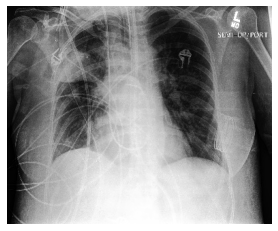

In [17]:
# Pick one image.
img_id = img_ids[0]
img_info = coco_annotation.loadImgs([img_id])[0]
img_file_name = img_info["file_name"]
img_url = img_info["coco_url"]
print(
    f"Image ID: {img_id}, File Name: {img_file_name}, Image URL: {img_url}"
)

# Get all the annotations for the specified image.
ann_ids = coco_annotation.getAnnIds(imgIds=[img_id], iscrowd=False)
anns = coco_annotation.loadAnns(ann_ids)
print(f"Annotations for Image ID {img_id}:")
pprint(anns)

# Use URL to load image.
im = Image.open(os.path.join(data_dir, img_info['file_name']))

# Save image and its labeled version.
# plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(np.asarray(im), cmap='gray')
plt.savefig(f"{img_id}.jpg", bbox_inches="tight", pad_inches=0)
# Plot segmentation and bounding box.
coco_annotation.showAnns(anns=anns)

In [19]:
coco_annotation.annToMask(anns[0]).shape

(2048, 2494)

In [22]:
len(anns)

5

In [30]:
np.asarray(im).shape

(320, 389)

In [35]:
im.height, im.width

(320, 389)

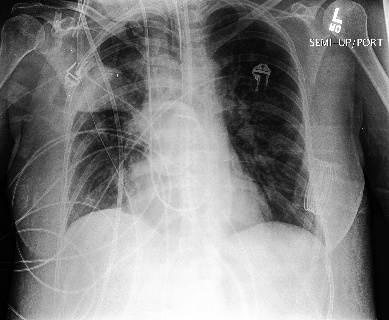

In [36]:
im.show()

In [9]:
# anns

im shape:  320 389


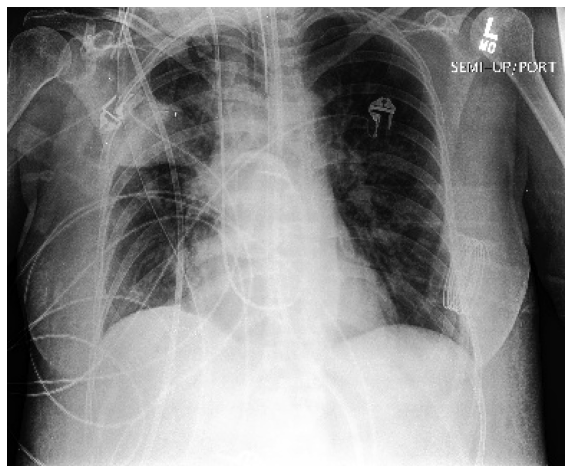

In [38]:
# Use URL to load image.
im = Image.open(os.path.join(data_dir, img_info['file_name']))
print('im shape: ', im.height, im.width)

# Save image and its labeled version.
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(np.asarray(im), cmap='gray')
plt.savefig(f"{img_id}.jpg", bbox_inches="tight", pad_inches=0)

In [11]:
alt_dir = '/opt/patchcore/data/images/'

im shape:  2048 2494


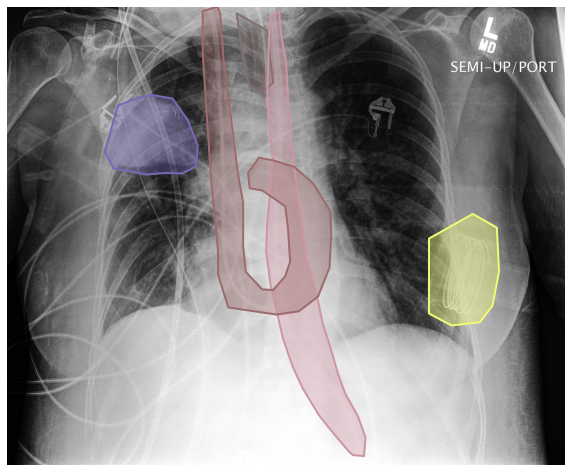

In [43]:
# Use URL to load image.
im = Image.open(os.path.join(alt_dir, img_info['file_name']))
print('im shape: ', im.height, im.width)

# Save image and its labeled version.
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(np.asarray(im), cmap='gray')

coco_annotation.showAnns(anns=anns)

plt.savefig(f"{img_id}.jpg", bbox_inches="tight", pad_inches=0)

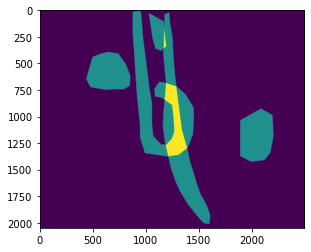

In [41]:
canvas = np.zeros(np.asarray(im).shape)

for a in anns:
    # print(coco_annotation.annToMask(a).shape)
    canvas += coco_annotation.annToMask(a)
    
plt.imshow(canvas)
plt.show()


In [ ]:
# coco_annotation.showAnns(anns, draw_bbox=True)

In [ ]:
# anns